In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [16]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding ='unicode_escape').drop(["Date", "Holiday", "Seasons"], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [17]:
df.columns = dataset_cols
df['functional'] = (df['functional']=='Yes').astype(int)
df = df.drop(['hour'], axis = 1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


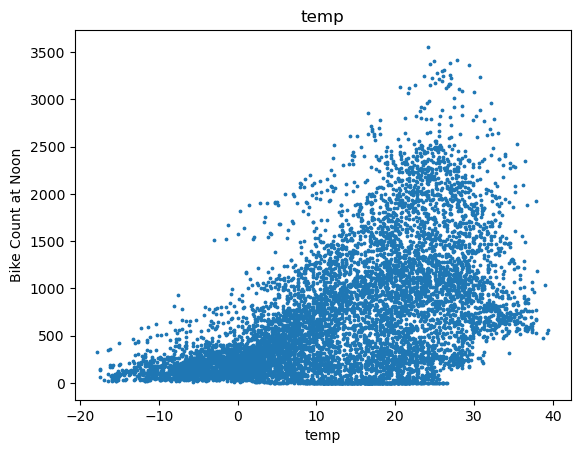

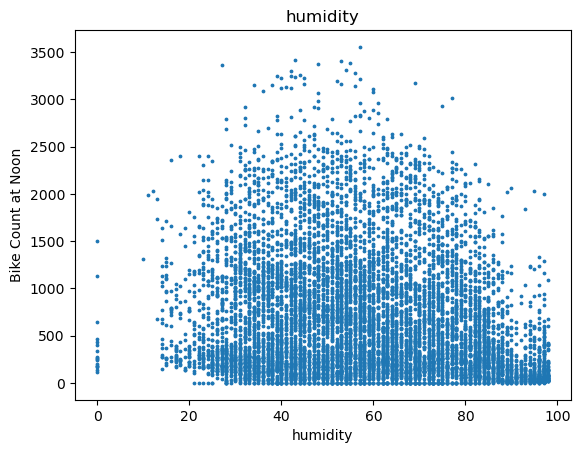

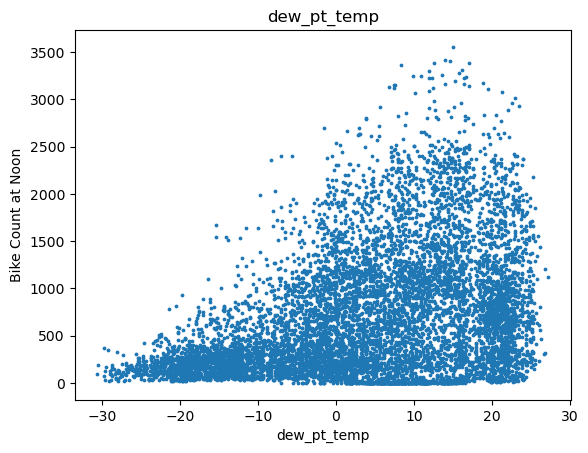

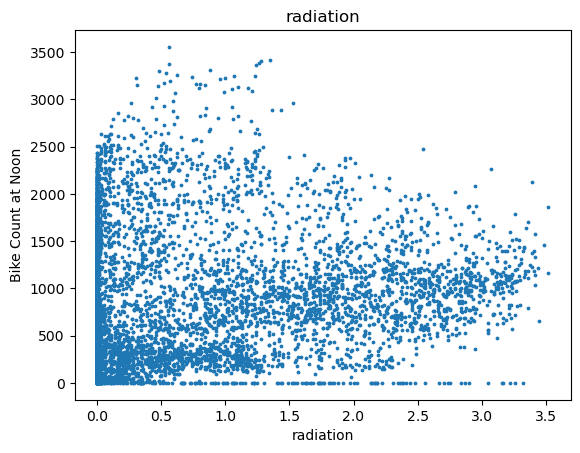

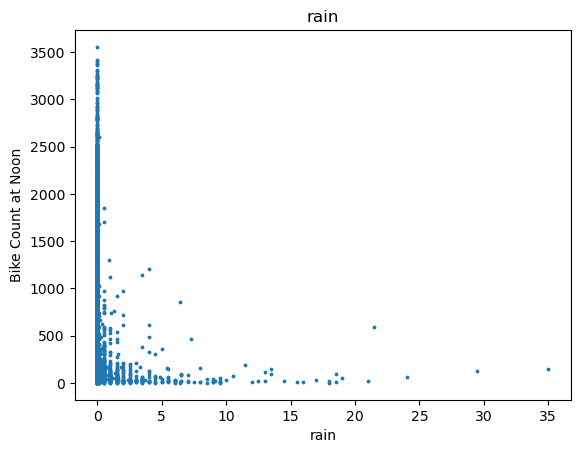

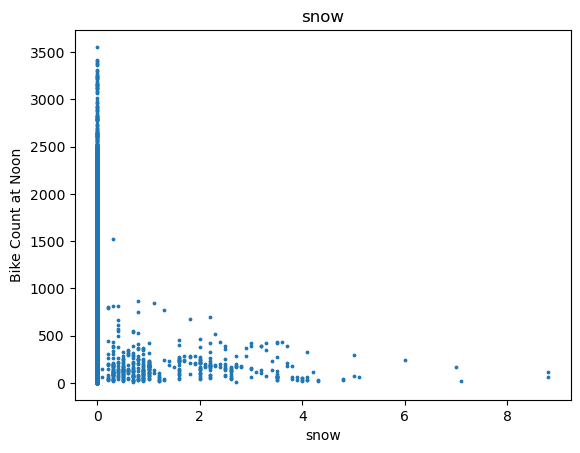

In [30]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"], s=3)
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [32]:
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


In [33]:
#Train/Valid/Test Dataset

train, val, test = np.split(df.sample(frac =1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [46]:
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    
    return data, X, y
        

In [36]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels = ["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels = ["temp"])

In [37]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [39]:
temp_reg.score(X_train_temp,y_train_temp)

0.2945676267176368

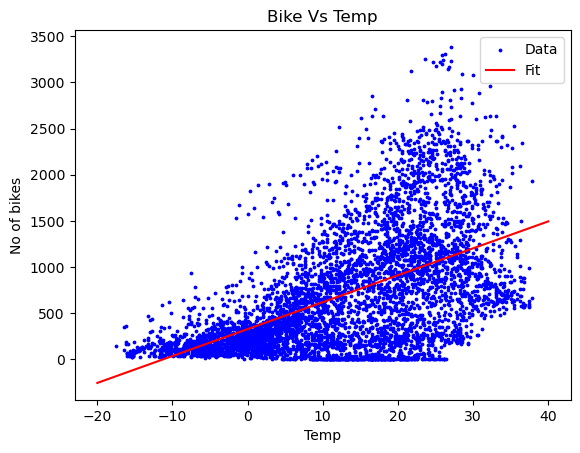

In [41]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color = "blue", s=3)
x =tf.linspace(-20,40, 100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label ="Fit", color = "red")
plt.legend()
plt.title("Bike Vs Temp")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

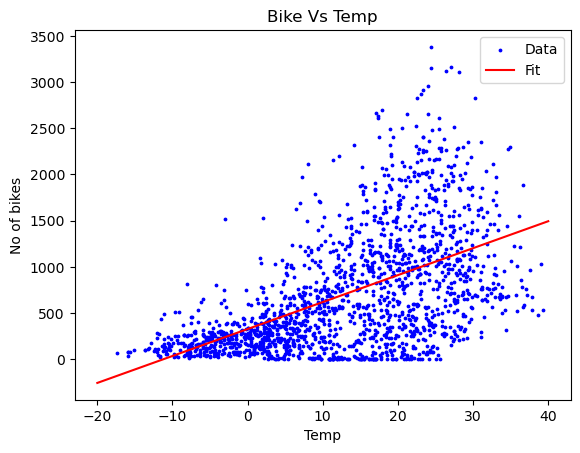

In [42]:
plt.scatter(X_test_temp, y_test_temp, label = "Data", color = "blue", s=3)
x =tf.linspace(-20,40, 100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label ="Fit", color = "red")
plt.legend()
plt.title("Bike Vs Temp")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

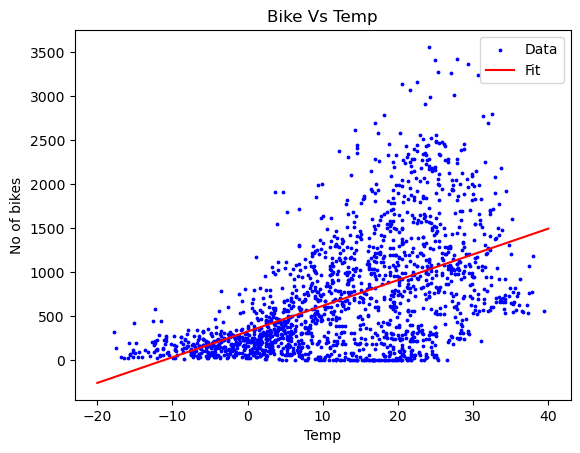

In [43]:
plt.scatter(X_val_temp, y_val_temp, label = "Data", color = "blue", s=3)
x =tf.linspace(-20,40, 100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label ="Fit", color = "red")
plt.legend()
plt.title("Bike Vs Temp")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

In [47]:
#Multiple Linear Regression
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels = df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels = df.columns[1:])


In [48]:
all_reg = LinearRegression()

all_reg.fit(X_train_all, y_train_all)


LinearRegression()

In [49]:
all_reg.score(X_test_all, y_test_all)

0.39479571555557336

In [51]:
y_pred_lin_reg = all_reg.predict(X_test_all)

In [52]:
#Linear Regresson using Neural Network and tensorflow
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))



In [58]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [53]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [54]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss= 'mean_squared_error')


In [56]:
history =temp_nn_model.fit(
X_train_temp.reshape(-1), y_train_temp,
verbose = 0,
epochs = 1000,
validation_data = (X_val_temp, y_val_temp))

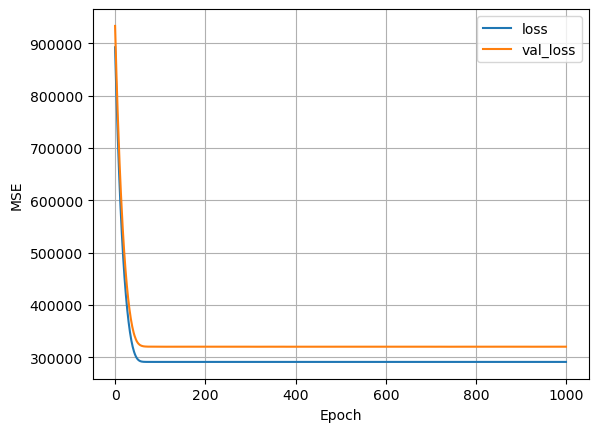

In [59]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


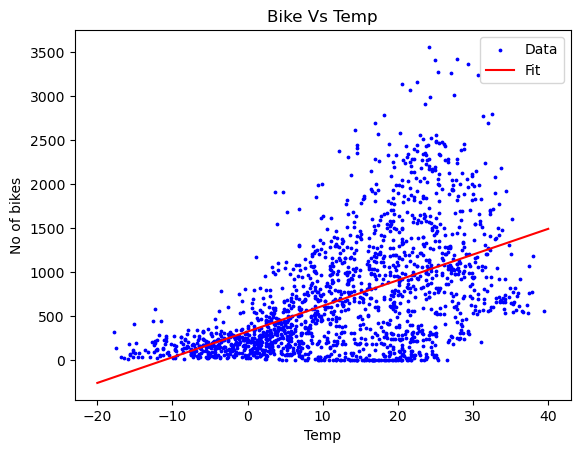

In [60]:
plt.scatter(X_val_temp, y_val_temp, label = "Data", color = "blue", s=3)
x =tf.linspace(-20,40, 100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label ="Fit", color = "red")
plt.legend()
plt.title("Bike Vs Temp")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

In [73]:
#Actual Neural Network
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss ='mean_squared_error') 

In [74]:
#Sample for just temperature label
history = nn_model.fit(
X_train_temp, y_train_temp,
validation_data = (X_val_temp, y_val_temp),
verbose = 0, epochs = 100)

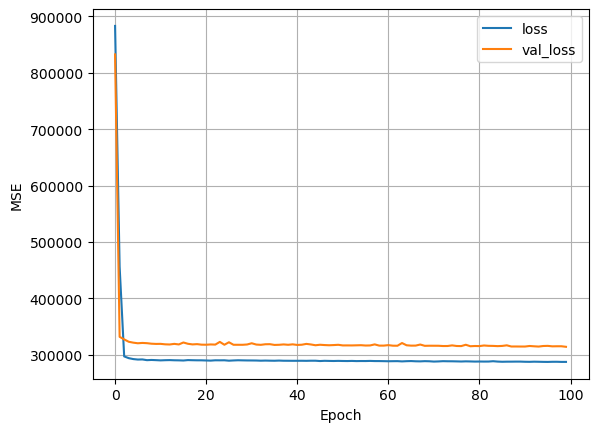

In [75]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


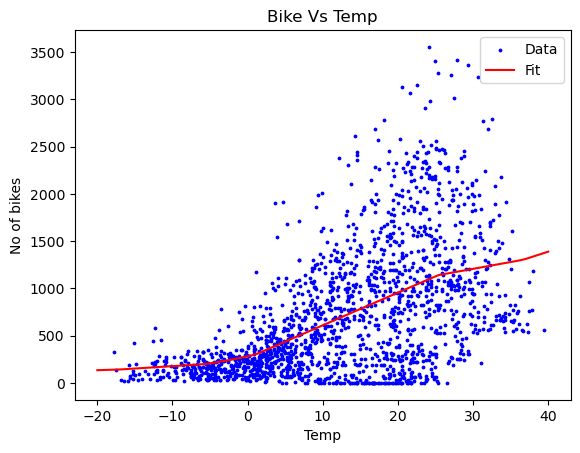

In [76]:
plt.scatter(X_val_temp, y_val_temp, label = "Data", color = "blue", s=3)
x =tf.linspace(-20,40, 100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label ="Fit", color = "red")
plt.legend()
plt.title("Bike Vs Temp")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

In [78]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis = -1)
all_normalizer.adapt(X_train_all)

In [80]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss ='mean_squared_error') 

In [81]:
history = nn_model.fit(
X_train_all, y_train_all,
validation_data = (X_val_all, y_val_all),
verbose = 0, epochs = 100)

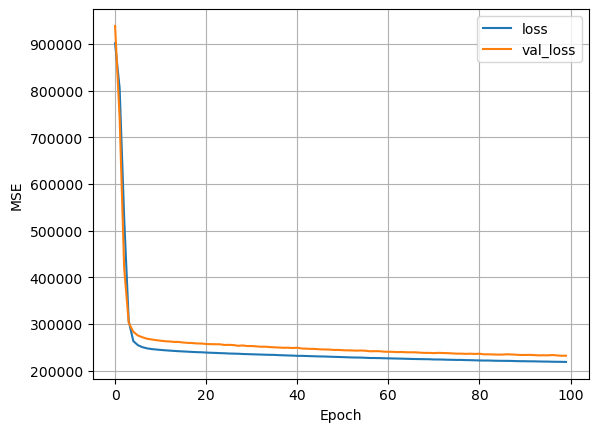

In [82]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


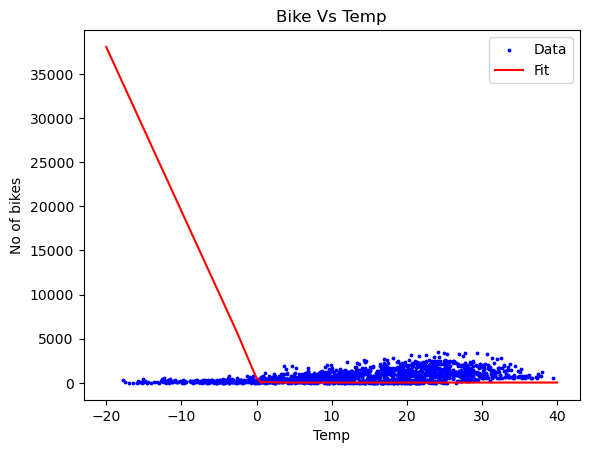

In [83]:
plt.scatter(X_val_temp, y_val_temp, label = "Data", color = "blue", s=3)
x =tf.linspace(-20,40, 100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label ="Fit", color = "red")
plt.legend()
plt.title("Bike Vs Temp")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

In [84]:
#calcualte the mean sqaured error
y_pred_lin_reg = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)


55/55 [==============================] - 0s 2ms/step


In [88]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()
    

In [89]:
MSE(y_pred_lin_reg, y_test_all)


239301.73483173753

In [90]:
MSE(y_pred_nn, y_test_all)

207541.22611639992

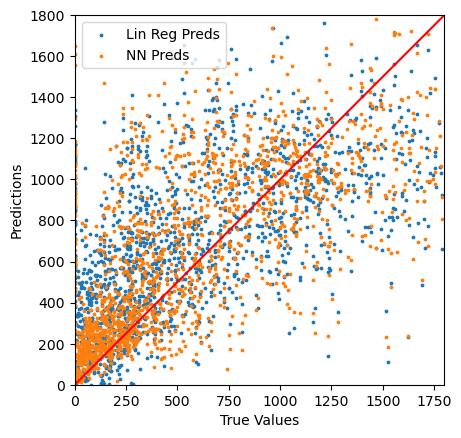

In [95]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all, y_pred_lin_reg, label = "Lin Reg Preds", s =3)
plt.scatter(y_test_all, y_pred_nn,label = "NN Preds", s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
plt.plot(lims, lims, c = "red")
plt.show()